- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
- Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data['Source'] = 'train'
test_data['Source'] = 'test'
data = pd.concat([train_data,test_data],ignore_index=True)

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data.shape

(14204, 13)

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [9]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Source                           2
dtype: int64

In [10]:
# filter categorival variables
categori_col = []
for x in data.dtypes.index:
    if data.dtypes[x]=='object':
        categori_col.append(x)

In [11]:
categori_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Source']

In [12]:
id_categori_col = ['Item_Identifier','Outlet_Identifier','Source']
new_cat_col = []
for x in categori_col:    
    if x not in id_categori_col:
        new_cat_col.append(x)
        

In [13]:
for col in new_cat_col:
    print("Frequency of categories for variables : ",col)
    print(data[col].value_counts())
    print("")

Frequency of categories for variables :  Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categories for variables :  Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categories for variables :  Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of categories for variables :  Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Ty

In [12]:
#item_avg_weight = data.pivot_table(values = 'Item_Weight',index='Item_Identifier')

In [13]:
#item_avg_weight.sort_values(by='Item_Weight',ascending=False)

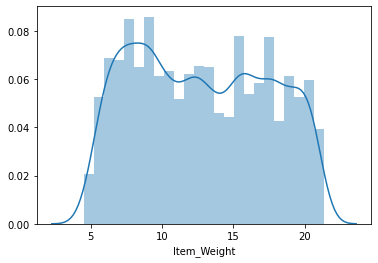

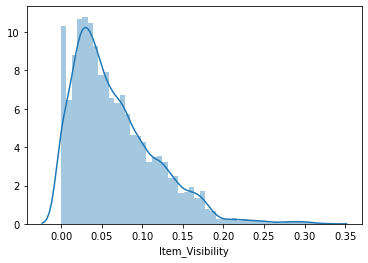

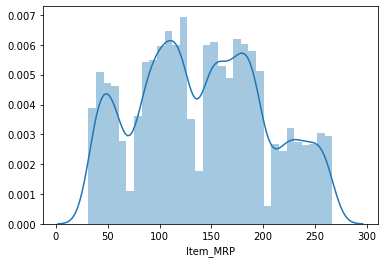

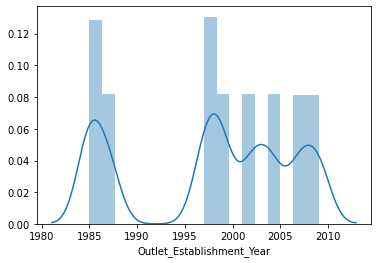

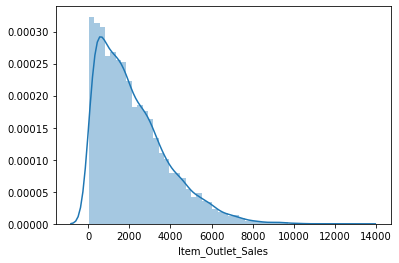

In [14]:
for i in data.describe().columns:
    sns.distplot(data[i].dropna())
    plt.show()

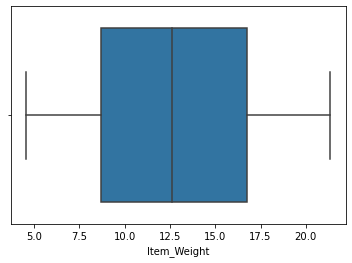

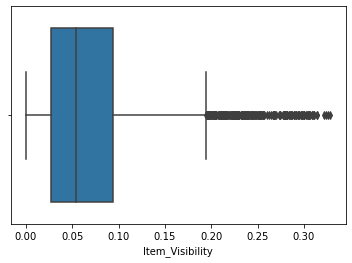

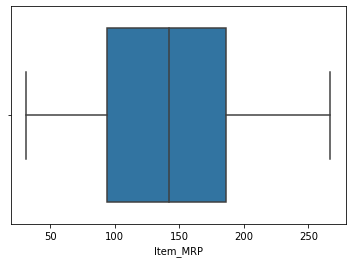

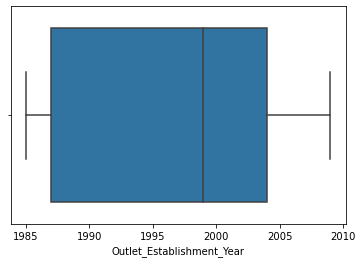

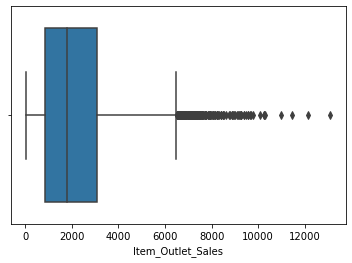

In [15]:
for i in data.describe().columns:
    sns.boxplot(data[i].dropna())
    plt.show()

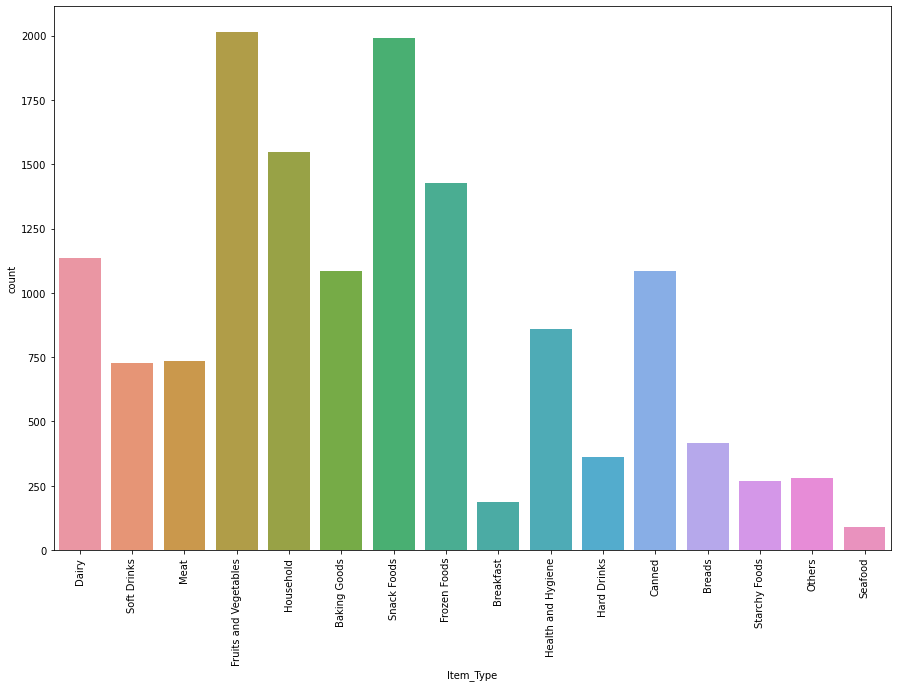

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)
plt.show()

In [17]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

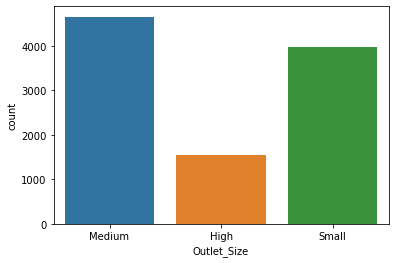

In [18]:
sns.countplot(data.Outlet_Size)
plt.show()

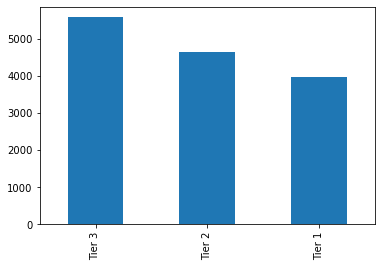

In [19]:
data.Outlet_Location_Type.value_counts().plot.bar()
plt.show()

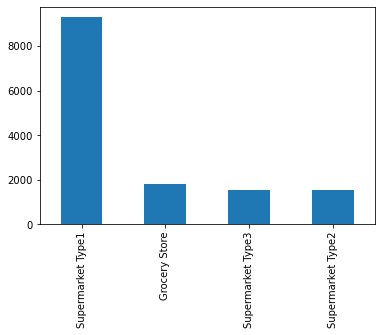

In [20]:
data.Outlet_Type.value_counts().plot.bar()
plt.show()

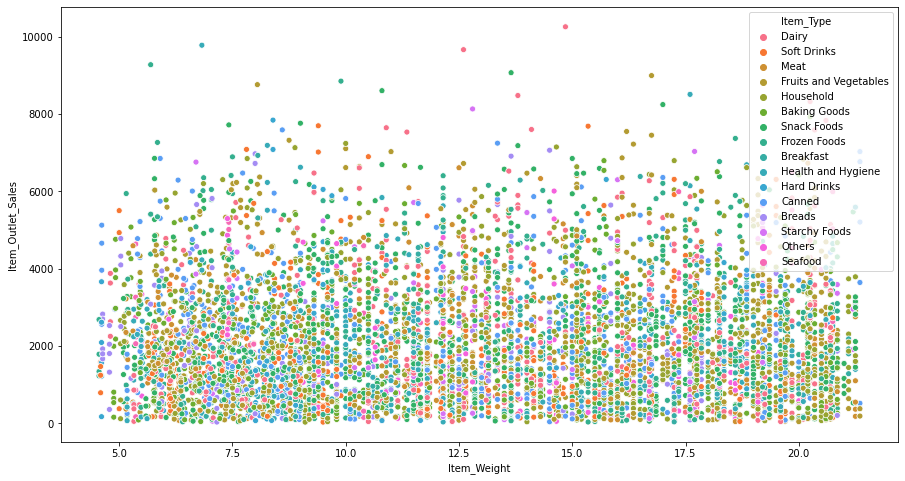

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data.Item_Weight, y=data.Item_Outlet_Sales,hue=data.Item_Type)
plt.show()

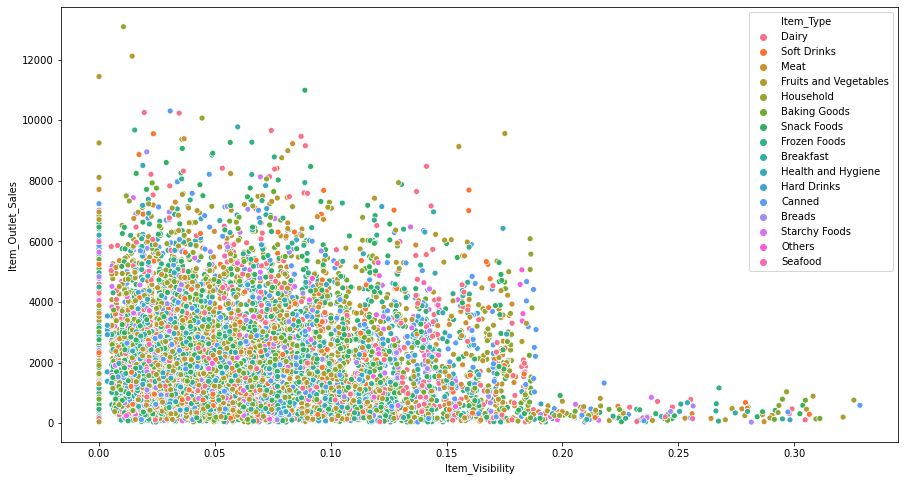

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data.Item_Visibility,y=data.Item_Outlet_Sales,hue=data.Item_Type)
plt.show()

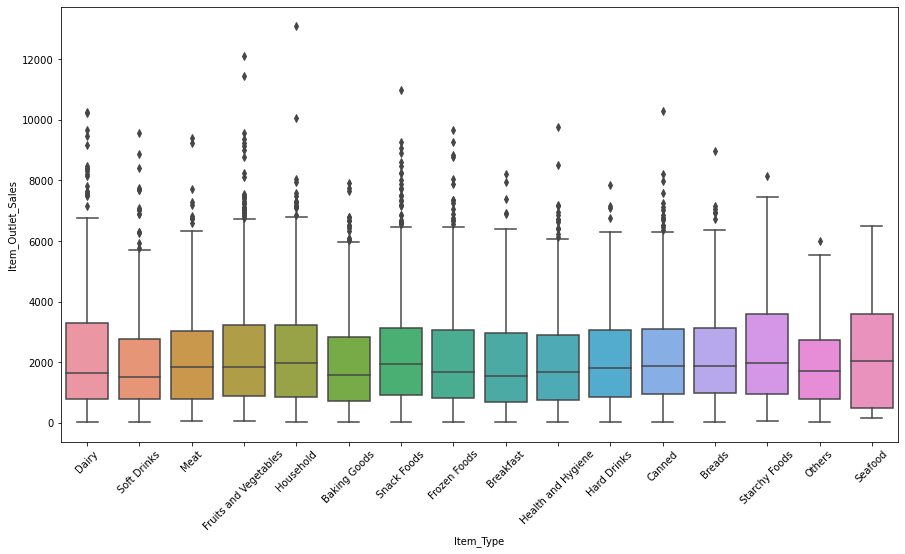

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Item_Type,y=data.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

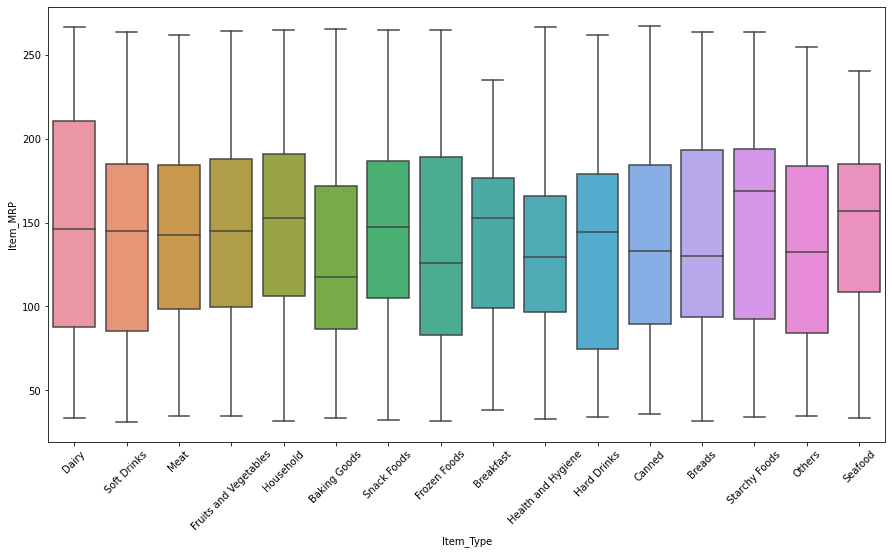

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Item_Type,y=data.Item_MRP)
plt.xticks(rotation=45)
plt.show()

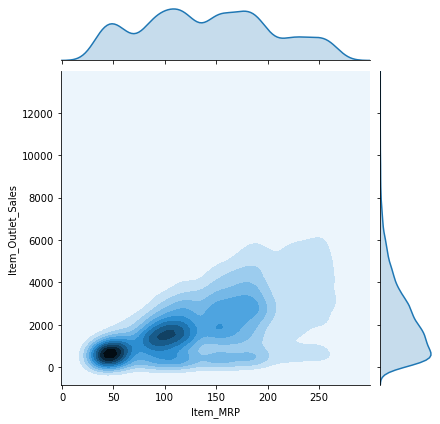

In [25]:
sns.jointplot(train_data.Item_MRP,train_data.Item_Outlet_Sales, kind='kde')
plt.show()

In [26]:
pivat_Outlet_Type = train_data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)
pivat_Outlet_Type

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,256.9988
Supermarket Type1,1990.7420
Supermarket Type2,1655.1788
Supermarket Type3,3364.9532


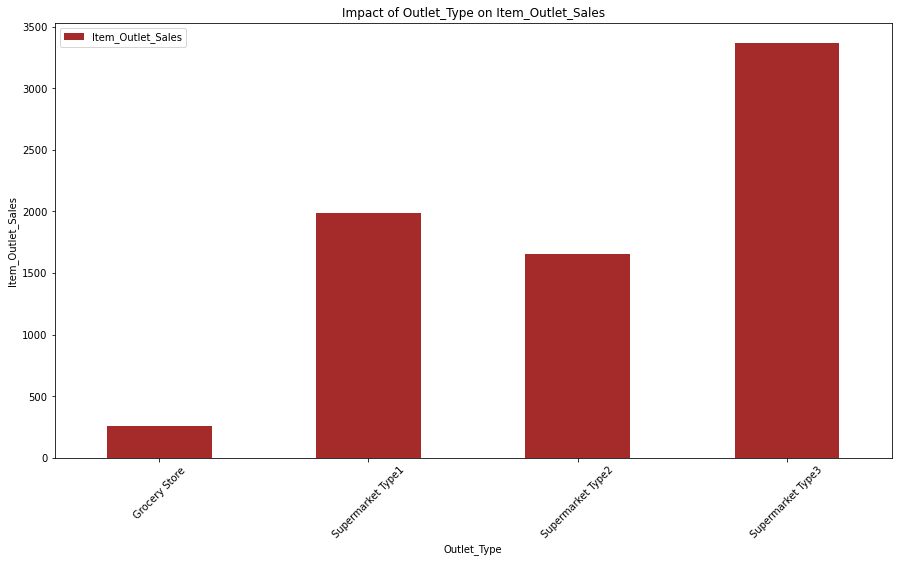

In [27]:
pivat_Outlet_Type.plot(kind='bar',color='brown',figsize=(15,8))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Type on Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()

In [28]:
pivat_Item_Type = train_data.pivot_table(index='Item_Type',values='Item_Outlet_Sales',aggfunc=np.mean)
pivat_Item_Type

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


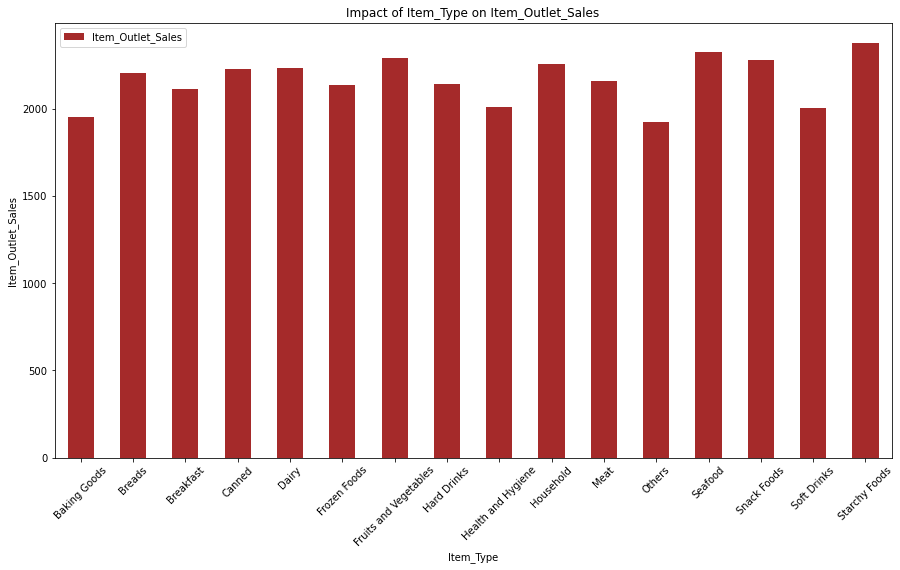

In [29]:
pivat_Item_Type.plot(kind='bar',color='brown',figsize=(15,8))
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Type on Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()

In [30]:
pivat_Item_Fat = train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.mean)
pivat_Item_Fat

,Item_Outlet_Sales
Item_Fat_Content,
LF,2073.551928
Low Fat,2164.477336
Regular,2235.186702
low fat,2087.740737
reg,1962.192268


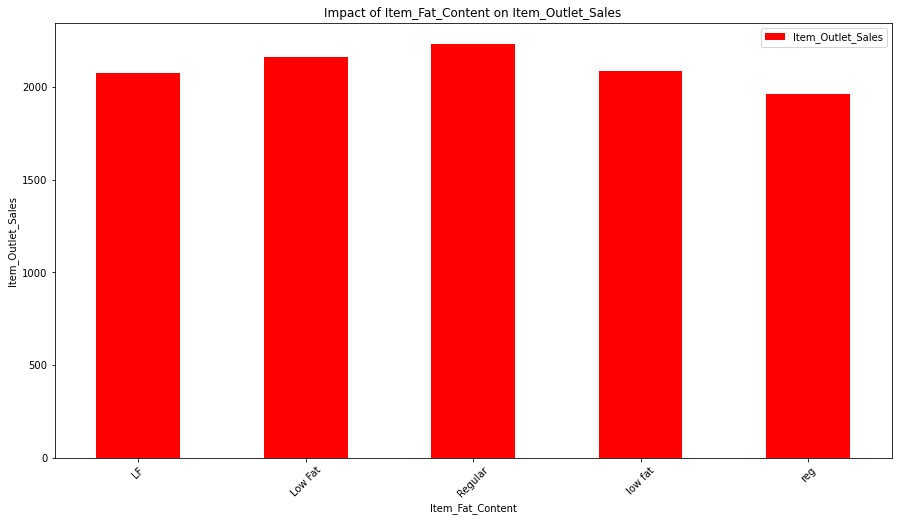

In [31]:
pivat_Item_Fat.plot(kind='bar',color='red',figsize=(15,8))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()

In [32]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [33]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [37]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [38]:
pivat_Item_Fat = data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.mean)
pivat_Item_Fat

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


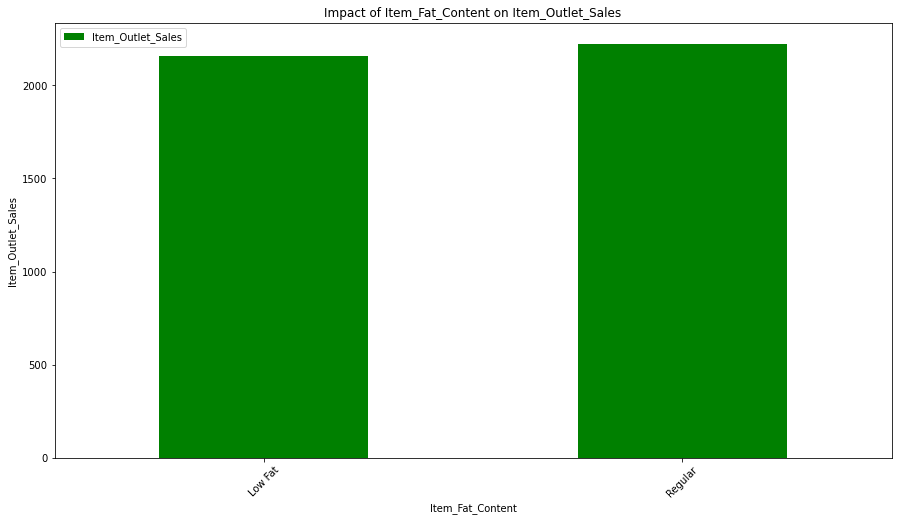

In [39]:
pivat_Item_Fat.plot(kind='bar',color='green',figsize=(15,8))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()

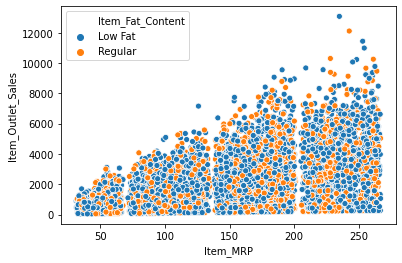

In [40]:
sns.scatterplot(x=data.Item_MRP, y=data.Item_Outlet_Sales, hue=data.Item_Fat_Content)
plt.show()

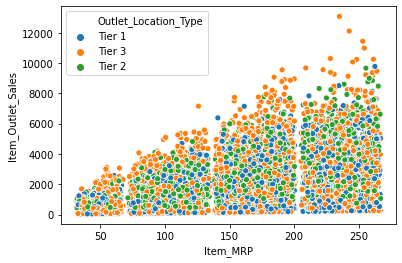

In [41]:
sns.scatterplot(x=data.Item_MRP, y=data.Item_Outlet_Sales, hue=data.Outlet_Location_Type)
plt.show()

In [42]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


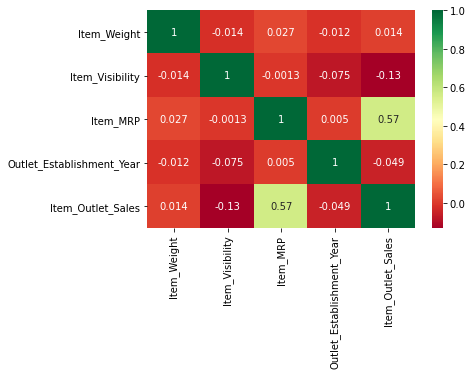

In [43]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [44]:
## Feature Engineering and transformation

- Item_Weight

from box we plotted at begining, we noticed that the item weight column is approximately 'Gaussian Distribution' so it will be a good choice to replace the NaN value with the mean of the column

In [45]:
data['Item_Weight'].mean()

12.792854228644284

In [46]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

- Outliet_Size

we will replacing the NaN values in the Outlet_Zise column with median since we don't precisely know the Outlet_size, so we cannot say it is 'Large' or it is 'Small', but 'Medium' lies in between large and small so it is ideal to consider it that way and also 'model' (i.e Outlet_Size that appears mostly) is medium

In [47]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [48]:
data['Outlet_Size'].fillna('Medium',inplace=True)

In [49]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

we concatenate the train_data and test_Data and most importantly the test_data does not have any columns of Item_Outlet_Sales , it is only in the train_data, also we notice that our data df is consisting of 12 columns BUT our test data is having 11 columns so since it is not haing the Item_Outlet_Sales we expect it to be filled with NaN, besides that is our target column so we need not to worry about it

- Item_Visibility

the Item_Visibility had the min value 0 from earlier descriptive statistics, but all the items needs to be visible to the customers, meaning those items that were not available obviously did not have visibility and were captured as 0, this is an indication that we need to trat this as a missing values

In [50]:
data[data['Item_Visibility']==0]['Item_Visibility'].count()

879

In [51]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

- Outlet_Year

In [52]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [53]:
data['Outlet_No_Of_Year'] = 2009-data['Outlet_Establishment_Year'] 
data['Outlet_No_Of_Year'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_No_Of_Year, dtype: float64

- Item_Type

In [54]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

- The Item types are either Food, Drinks or Non-Consumables
 

In [55]:
data['Item_Identifier'].value_counts()

FDW34    10
FDM20    10
FDC32    10
FDD58    10
NCV42    10
         ..
FDM50     7
FDM52     7
FDO33     7
FDH58     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64

- A closer look at each of the 'Item_Identifier' shows that they either starts with either "FD"(Food), "DR"(Drinks) or "NC" (Non-Consumables) this 3 categories
- For us to do a better analysis, we will be creating 3 catefories as pointed out instead of the already existing 16 categories

In [56]:
# changing only the first 2 characters (i.e the category ID)
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [57]:
# rename them to more intuitive categories
data['New_Item_Type'] = data['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [58]:
data['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

- If a product is non-consumable then why association a fat-content to that?
- we will get rid of this

In [59]:
data.loc[data['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'

In [60]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

- Under normal distribution,  if a product is more visible, then it's likely it will be getting higher sales, we can based on that hyperothesis,
- importance given to a product in a given store according to the mean of significance given to the same product in all stories

In [61]:
item_visib_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [62]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [63]:
## deal with categorical variables

In [100]:
# remove un-neccessary columns

In [96]:
no_use = ['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier']

In [97]:
data.drop(columns=no_use, inplace=True, axis=1)

In [98]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_No_Of_Year,New_Item_Type
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,train,11,Food
4,8.93,Non-Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable


In [99]:
virib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type']

In [101]:
for i in virib:
    print(i ,": ",data[i].unique())

Item_Fat_Content :  ['Low Fat' 'Regular' 'Non-Edible']
Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Size :  ['Medium' 'High' 'Small']
New_Item_Type :  ['Food' 'Drinks' 'Non-Consumable']
Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [102]:
dummies_data = pd.get_dummies(data[virib],drop_first=True)

In [104]:
dummies_data.head()

,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,1,0,1,0,1,0,0
1,0,1,0,1,1,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,1,0,0
3,0,1,0,1,1,0,1,0,0,0,0
4,1,0,0,1,0,0,0,1,1,0,0


In [105]:
data.drop(columns=virib, axis=1, inplace=True)

In [106]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Outlet_No_Of_Year
0,9.30,0.016047,249.8092,3735.1380,train,10
1,5.92,0.019278,48.2692,443.4228,train,0
2,17.50,0.016760,141.6180,2097.2700,train,10
3,19.20,0.000000,182.0950,732.3800,train,11
4,8.93,0.000000,53.8614,994.7052,train,22


In [107]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Source', 'Outlet_No_Of_Year'],
      dtype='object')

In [117]:
col = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_No_Of_Year']
def min_max_scale(data,col):
    mms = MinMaxScaler()
    data[col] = mms.fit_transform(data[[col]])
    return data
    

In [118]:
for col in col:
    data = min_max_scale(data,col)

In [119]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Outlet_No_Of_Year
0,0.282525,0.048866,0.927507,3735.1380,train,0.416667
1,0.081274,0.058705,0.072068,443.4228,train,0.000000
2,0.770765,0.051037,0.468288,2097.2700,train,0.416667
3,0.871986,0.000000,0.640093,732.3800,train,0.458333
4,0.260494,0.000000,0.095805,994.7052,train,0.916667


In [120]:
final_data = pd.concat([data,dummies_data], axis=1)

In [122]:
final_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Outlet_No_Of_Year,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,3735.1380,train,0.416667,0,0,0,0,1,0,1,0,1,0,0
1,0.081274,0.058705,0.072068,443.4228,train,0.000000,0,1,0,1,1,0,0,0,0,1,0
2,0.770765,0.051037,0.468288,2097.2700,train,0.416667,0,0,0,0,1,0,1,0,1,0,0
3,0.871986,0.000000,0.640093,732.3800,train,0.458333,0,1,0,1,1,0,1,0,0,0,0
4,0.260494,0.000000,0.095805,994.7052,train,0.916667,1,0,0,1,0,0,0,1,1,0,0


In [196]:
train_new_data = final_data.loc[final_data['Source'] == 'train']

In [212]:
test_new_data = final_data.loc[final_data['Source'] == 'test']

In [197]:
train_new_data.shape

(8523, 17)

In [198]:
test_new_data.shape

(5681, 17)

In [199]:
test_new_data.drop(columns=['Item_Outlet_Sales','Source'], axis=1, inplace=True)

#### final test Data

In [215]:
final_test_data = test_new_data
final_test_data.to_csv("final_modify_test.csv", index = False)

In [202]:
X = train.drop(['Item_Outlet_Sales','Source'],axis=1)
y = train['Item_Outlet_Sales']

In [200]:
from sklearn.model_selection import train_test_split

In [203]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [204]:
x_train.shape, x_test.shape

((6818, 15), (1705, 15))

## LInear Regression

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [236]:
lr = LinearRegression()

In [237]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1129.7275124616672

## Decision Tree

In [233]:
from sklearn.tree import DecisionTreeRegressor

In [234]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = rr.predict(x_test)
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
dt_rmse

1129.7271530350058

## Random Forest

In [218]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [224]:
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
rf_rmse

1144.0911137611392

## Regularization Linear Regression

In [223]:
from sklearn.linear_model import Ridge , Lasso

In [225]:
rr = Ridge(alpha=0.01)
rr.fit(x_train,y_train)
rr_pred = rr.predict(x_test)
rr_rmse = np.sqrt(mean_squared_error(y_test,rr_pred))
rr_rmse

1129.7271530350058

In [226]:
lo = Lasso(alpha=0.05)
lo.fit(x_train,y_train)
lo_pred = lo.predict(x_test)
lo_rmse = np.sqrt(mean_squared_error(y_test,lo_pred))
lo_rmse

1129.7078872907086

## XGboost

In [238]:
# from xgboost import XGBRegressor

In [239]:
# xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.02, random_state = 42)
# xgb.fit(x_train,y_train)
# xgb_pred = xgb.predict(x_test)
# xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
# xgb_rmse

## Final Prediction on test dataset

In [231]:
final_test = pd.read_csv('final_modify_test.csv')

In [ ]:
final_pred = lr.predict(final_test)
final_pred